<a href="https://colab.research.google.com/github/priya606/MY-OWN-PROJECTS/blob/main/EDA(titanic_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv('/content/train.csv - train.csv.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                        

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.nunique().sum()

2970

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## check for duplicated values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

## dealing with missing values
### if missing values is large wrt total values then dropping those values is suitable strategy

In [ ]:
titanic=df.drop('Cabin',axis=1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### in numerical values missing values are replaced by mean() values

In [ ]:
avg_age=titanic['Age'].mean()

In [ ]:
avg_age

29.69911764705882

In [ ]:
titanic['Age'].replace(np.nan,avg_age,inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### in categorical missing values are replaced by mode

In [ ]:
mode_embark=titanic['Embarked'].mode()[0]
titanic['Embarked'].replace(np.nan,mode_embark,inplace=True)

In [ ]:
mode_embark

'S'

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### to check dead and survived in terms of plot

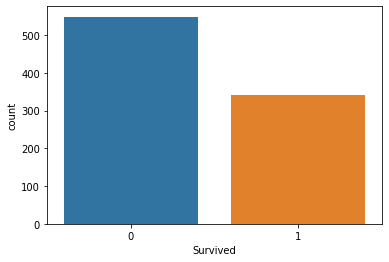

In [ ]:
sns.countplot(x='Survived',data=titanic)

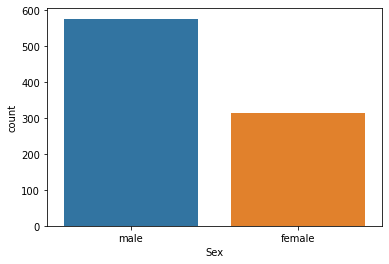

In [ ]:
sns.countplot(x='Sex',data=titanic)

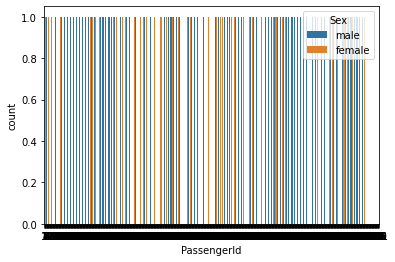

In [ ]:
sns.countplot(x='PassengerId',hue='Sex',data=titanic)

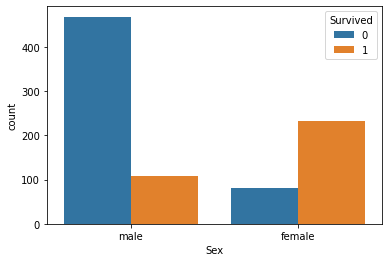

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=titanic)

### men survival rate

In [ ]:
men_survive=titanic[titanic.Sex=='male']['Survived']
men_rate=(sum(men_survive)/len(men_survive))*100
men_rate

18.890814558058924

### women survival

In [ ]:
women_age=titanic[titanic.Sex=='female']['Age']
women_ages=(sum(women_age)/len(women_age))*100
women_ages

2821.6730048707395

###  survival using group function

In [ ]:
sur_rate=titanic.groupby('Sex')['Survived'].value_counts()
sur_rate

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
rate=titanic.groupby('Sex')['Survived'].value_counts(normalize=True)
rate

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

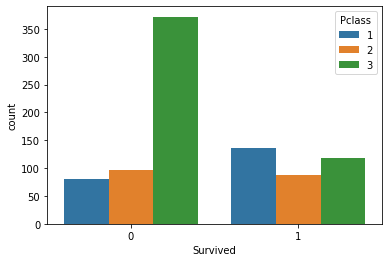

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [ ]:
pclass_1=titanic[titanic.Pclass==1]['Survived']
pclass=(sum(pclass_1)/len(pclass_1))*100
pclass

62.96296296296296

In [ ]:
titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

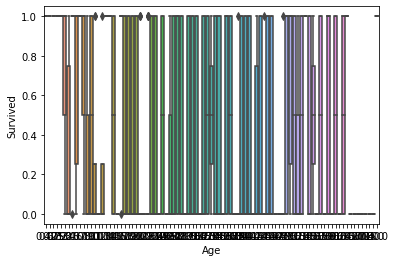

In [ ]:
sns.boxplot(x='Age',y='Survived',data=titanic)

In [ ]:
mean_age=titanic[titanic.Sex=='male']['Age'].mean()
print('mean age of men travelling on ship is:',mean_age)

mean age of men travelling on ship is: 30.50582424304206


In [ ]:
women_age=titanic[titanic.Sex=='female']['Age'].mean()
women_age

28.216730048707397

In [ ]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [ ]:
titanic.groupby('Age')['Survived'].value_counts(normalize=True).mean()

0.6180555555555556

In [ ]:
survive=titanic[titanic.Survived==1]['Age'].mean()
survive

28.54977812177503

In [ ]:
survive_women=titanic[titanic.Survived==0]['Age'].mean()
survive_women

30.415099646415896

In [ ]:
r1=titanic.groupby('Survived')['Age'].mean()
r1

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [ ]:
titanic.groupby(['Survived','Sex'])['Age'].mean()

Survived  Sex   
0         female    26.023272
          male      31.175224
1         female    28.979263
          male      27.631705
Name: Age, dtype: float64

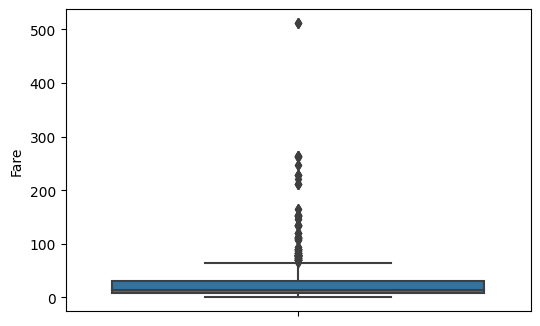

In [ ]:
plt.figure(dpi=100)
sns.boxplot(y='Fare',data=titanic)

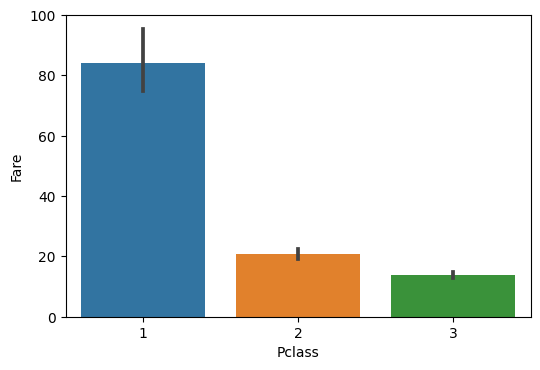

In [ ]:
plt.figure(dpi=100)
sns.barplot(x='Pclass',y='Fare',data=titanic)


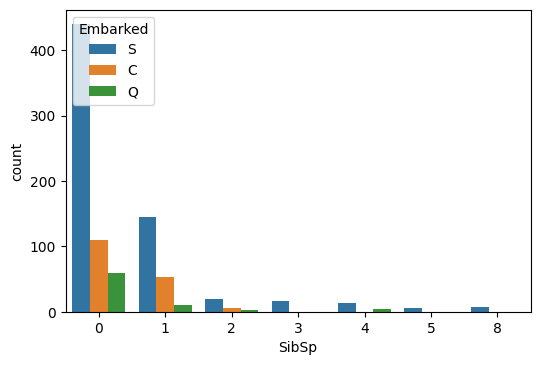

In [ ]:
plt.figure(dpi=100)
sns.countplot(x='SibSp',hue='Embarked',data=titanic)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic.drop(['Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1}).astype(int)


In [ ]:
titanic['Embarked']=titanic['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [ ]:
x=titanic[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=titanic[['Survived']]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrg=LogisticRegression()

In [ ]:
lrg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=lrg.predict(xtest)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0])

In [ ]:
df=pd.DataFrame()
df['actual_values']=ytest.values.ravel()
df['predicted_values']=y_pred.ravel()

In [ ]:
df.head(10)

,actual_values,predicted_values
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print('training score is:',accuracy_score(ytrain,lrg.predict(xtrain)))
print('testing score is:',accuracy_score(ytest,y_pred))

training score is: 0.7949438202247191
testing score is: 0.8379888268156425
